# Geo libraries

## Change Python environment 3.8.5 to 3.6.12

### Please see PinkWink web page how to install basemap module
### need to downgrade matplotlib 3.3.3 to 3.2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


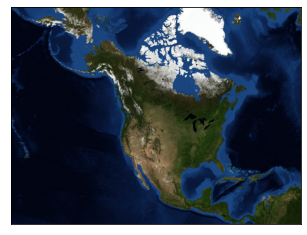

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-107.)
m.bluemarble()
plt.show()

c:\users\hmcho\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image


c:\users\hmcho\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


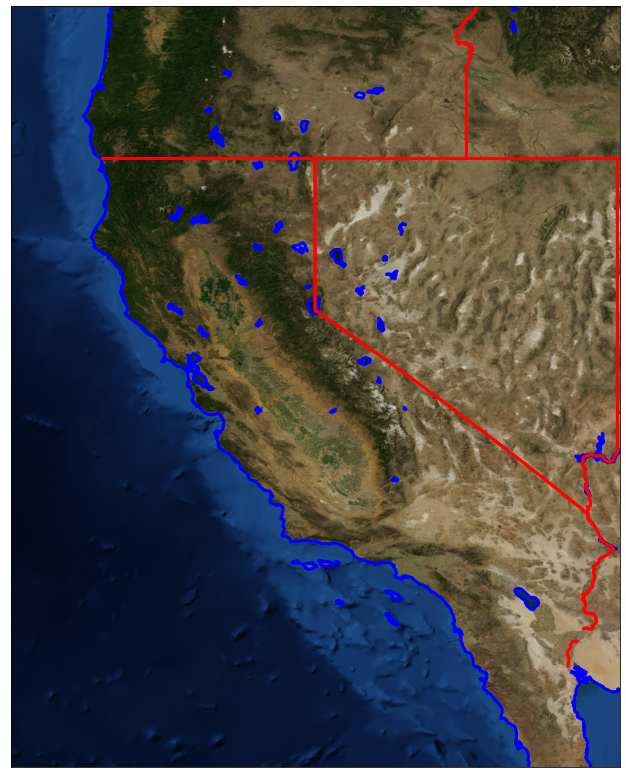

In [3]:
# Nessecary Imports
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Make the figure
plt.figure(figsize=(14, 14))
# Initialize the basemap
m = Basemap(llcrnrlat = 30,
            llcrnrlon = -126,
            urcrnrlat = 45,
            urcrnrlon = -114,
           resolution='h')
# Get the area of interest imagery
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2500, verbose= True,alpha= .6)
# Draw the coasts
m.drawcoastlines(color='blue', linewidth=3)
# Draw the states
m.drawstates(color='red',linewidth=3)

c:\users\hmcho\anaconda3\envs\py36\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\hmcho\anaconda3\envs\py36\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\hmcho\anaconda3\envs\py36\lib\site-packages\matplotlib\collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
c:\users\hmcho\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  


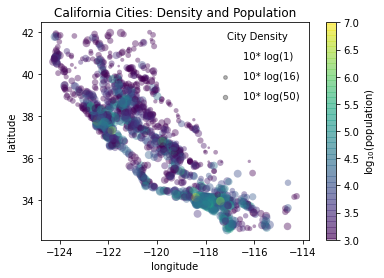

In [9]:
import pandas as pd
import numpy as np
# Read in data on all cities
cities = pd.read_csv('uscities.csv')
# Choose only cities in california
cities = cities.loc[cities.state_id == 'CA',:]
# Get all the data from the dataframe
lat, lon = cities['lat'], cities['lng']
population,density = cities['population'], cities['density']
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population),s= 10*np.log(density),
            cmap='viridis', linewidth=0, alpha= .4)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)
# make a guide for the user
for density in [1, 50//3, 50]:
    plt.scatter([], [], c='k', alpha=0.3, s=5*np.log(density),
                label='10* log('+str(density) + ')')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='City Density')
# add a title
plt.title('California Cities: Density and Population');

c:\users\hmcho\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # This is added back by InteractiveShellApp.init_path()


http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-126.0,29.999999999999996,-114.00000000000001,45.0&bboxSR=4326&imageSR=4326&size=2500,3125&dpi=96&format=png32&transparent=true&f=image


c:\users\hmcho\anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


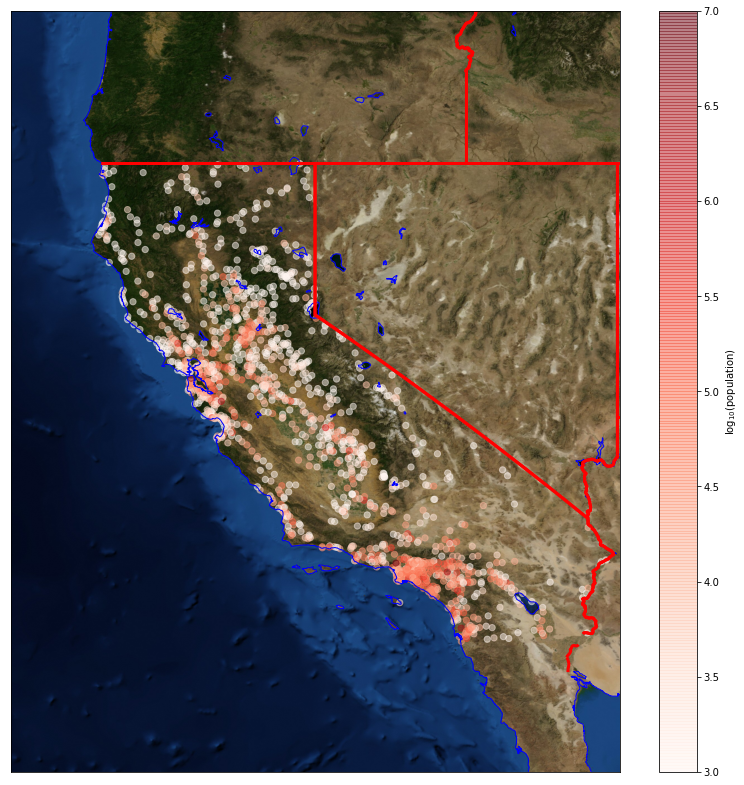

In [11]:
# Nessecary Imports
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
# Make the figure
plt.figure(figsize=(14, 14))
# Initialize the basemap
m = Basemap(llcrnrlat = 30,
            llcrnrlon = -126,
            urcrnrlat = 45,
            urcrnrlon = -114,
           resolution='h')
# Get the area of interest imagery
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 2500, verbose= True,alpha= .6)
# Draw the coasts
m.drawcoastlines(color='blue', linewidth=1)
# Draw the states
m.drawstates(color='red',linewidth=3)
m.scatter(lon, lat, latlon=True,
          c=np.log10(population), s=10*np.log(density),
          cmap='Reds', alpha=0.5)
# 3. create colorbar and legend
plt.colorbar(label=r'$\log_{10}({\rm population})$')
plt.clim(3, 7)